In [1]:
from solvation_shells_utils import *
import matplotlib.pyplot as plt
import numpy as np

Average performance over 16 simulations: 395


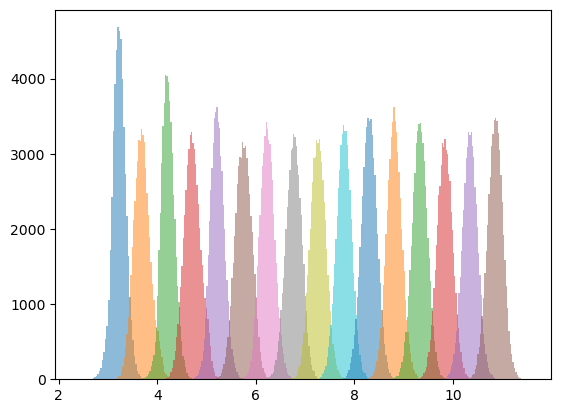

In [2]:
performance = np.zeros(16)
for i in range(16):
    u = UmbrellaSim(f'COLVAR_{i}')
    plt.hist(u.coordination_number, alpha=0.5, bins=50)
    performance[i] = u.get_performance(f'prod_{i}.log')


print(f'Average performance over 16 simulations: {performance.mean():.0f}')

In [3]:
umb = UmbrellaAnalysis(16)
umb

UmbrellaAnalysis object with 16 simulations

In [4]:
bins, fes = umb.calculate_FES(np.linspace(3,11,16), d_min=4, d_max=10, n_bootstraps=0, filename='fes.dat')

Warning on use of the timeseries module: If the inherent timescales of the system are long compared to those being analyzed, this statistical inefficiency may be an underestimate.  The estimate presumes the use of many statistically independent samples.  Tests should be performed to assess whether this condition is satisfied.   Be cautious in the interpretation of the data.

****** PyMBAR will use 64-bit JAX! *******
* JAX is currently set to 32-bit bitsize *
* which is its default.                  *
*                                        *
* PyMBAR requires 64-bit mode and WILL   *
* enable JAX's 64-bit mode when called.  *
*                                        *
* This MAY cause problems with other     *
* Uses of JAX in the same code.          *
******************************************



Statistical inefficiency of simulation 0: 3.614
Statistical inefficiency of simulation 1: 1.082
Statistical inefficiency of simulation 2: 1.344
Statistical inefficiency of simulation 3: 1.035
Statistical inefficiency of simulation 4: 1.081
Statistical inefficiency of simulation 5: 1.015
Statistical inefficiency of simulation 6: 1.025
Statistical inefficiency of simulation 7: 1.035
Statistical inefficiency of simulation 8: 1.002
Statistical inefficiency of simulation 9: 1.018
Statistical inefficiency of simulation 10: 1.000
Statistical inefficiency of simulation 11: 1.043
Statistical inefficiency of simulation 12: 1.037
Statistical inefficiency of simulation 13: 1.044
Statistical inefficiency of simulation 14: 1.018
Statistical inefficiency of simulation 15: 1.009



******* JAX 64-bit mode is now on! *******
*     JAX is now set to 64-bit mode!     *
*   This MAY cause problems with other   *
*      uses of JAX in the same code.     *
******************************************

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Text(0, 0.5, 'Free energy (kJ/mol)')

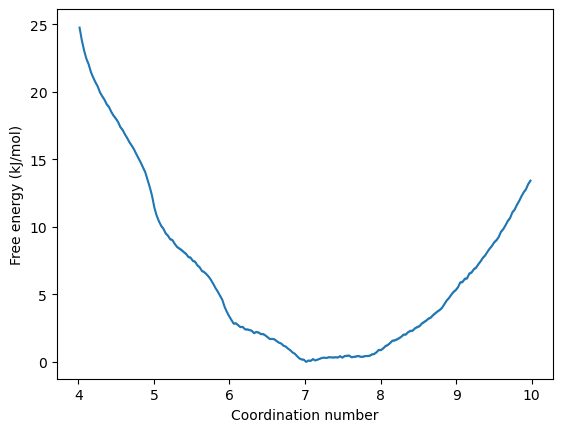

In [5]:
plt.plot(bins, fes)
plt.fill_between(bins, fes-umb.error, fes+umb.error, alpha=0.5, facecolor='tab:blue')
plt.xlabel('Coordination number')
plt.ylabel('Free energy (kJ/mol)')

array([6.06274167, 6.08466072, 6.1454411 , 6.1672768 , 6.21802154,
       6.23597283, 6.32843951, 6.36453013, 6.4219971 , 6.43847168,
       6.54453123, 6.57298588, 6.95453763, 6.97214047, 7.01637727,
       7.04912536, 7.07026108, 7.10692506, 7.14127793, 7.24614566,
       7.28082207, 7.32399239, 7.36421536, 7.39829418, 7.42667161,
       7.46331215, 7.49598183, 7.5377413 , 7.55152306, 7.57774901,
       7.62294491, 7.70405116, 7.75080638, 7.81031197, 7.83865356,
       7.98268934, 8.00214017, 8.31329879, 8.32540807, 8.39555268,
       8.41083506, 9.0646478 , 9.07651432, 9.12283287, 9.13408523,
       9.98169863])

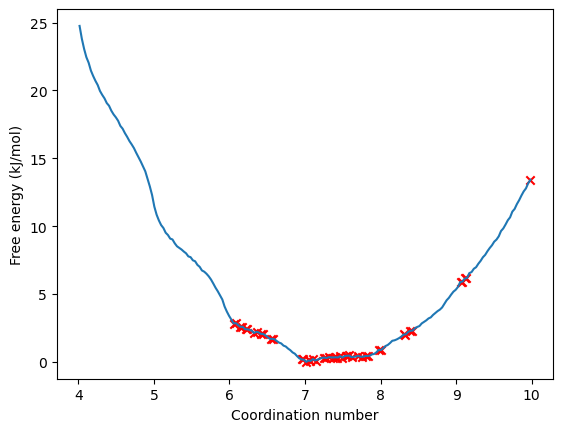

In [6]:
umb.find_minima(method='spline_roots', plot=True)

In [7]:
umb.minima_locs[umb.minima_vals.argmin()]

7.016377270458731

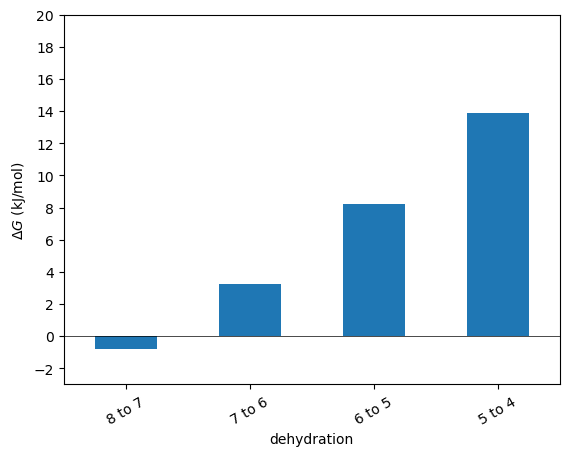

In [12]:
import pandas as pd

dCN = [(8,7), (7,6), (6,5), (5,4)]
dG = []
for d in dCN:
    dG.append(umb.get_dehydration_energy(d[1], d[0]))


df = pd.DataFrame()
df['dCN'] = [f'{cn[0]} to {cn[1]}' for cn in dCN]
df['dG'] = dG

df.plot(x='dCN', y='dG', kind='bar', legend=False)
plt.xlabel('dehydration')
plt.ylabel('$\Delta G$ (kJ/mol)')
plt.xticks(rotation=30)
plt.yticks(np.arange(-6,24,2))
plt.ylim(-3,20)
plt.axhline(0, c='k', lw=0.5)
plt.show()